<a href="https://colab.research.google.com/github/UmiraOzawa/data_science_chay_cmn_nha/blob/main/s1mple_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1,28*28).astype("float32")
X_test = X_test.reshape(-1,1,28*28).astype("float32")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def convolution_network():
  input_images = tf.keras.Input(shape = (28,28,1))
  Z1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1))(input_images)
  A1 = tf.keras.layers.ReLU()(Z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size = (3,3), strides = (1,1))(A1)
  F1 = tf.keras.layers.Flatten()(P1)
  D1 = tf.keras.layers.Dense(128, activation = "relu")(F1)
  D2 = tf.keras.layers.Dense(64, activation = "relu")(D1)
  D3 = tf.keras.layers.Dense(32, activation = "relu")(D2)
  outputs = tf.keras.layers.Dense(10, activation = "softmax")(D3)
  model = tf.keras.Model(inputs = input_images, outputs = outputs)
  return model

In [ ]:
conv_model = convolution_network()
conv_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
conv_model.fit(X_train, tf.keras.utils.to_categorical(Y_train), epochs=3, batch_size = 20)

Epoch 1/3
3000/3000 [==============================] - 111s 37ms/step - loss: 0.1963 - accuracy: 0.9482
Epoch 2/3
3000/3000 [==============================] - 110s 37ms/step - loss: 0.0996 - accuracy: 0.9711
Epoch 3/3
3000/3000 [==============================] - 109s 36ms/step - loss: 0.0784 - accuracy: 0.9778


In [ ]:
conv_model.evaluate(X_test, tf.keras.utils.to_categorical(Y_test))

313/313 [==============================] - 4s 11ms/step - loss: 0.1042 - accuracy: 0.9756


[0.10420946031808853, 0.975600004196167]

146
8


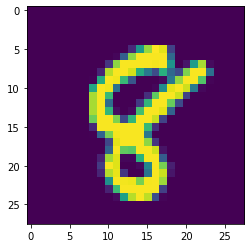

In [ ]:
y_prob = conv_model.predict(X_test) 
y_classes = y_prob.argmax(axis = -1)
a = input()
a = int(a)
imgplot = plt.imshow(X_test.reshape(X_test.shape[0],28,28)[a])
print(y_classes[a])

In [ ]:
import numpy as np
y_pred = []
y = np.array([0.5, 0.4, 0,8, 0.4])
y_pred = (y >= 0.5).astype("int")
y_pred

array([1, 0, 0, 1, 0])

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

99
[9]


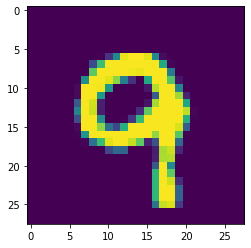

In [ ]:

a = input()
a= int(a)
y_pred = model.predict(X_test[a])
imgplot = plt.imshow(X_test.reshape(X_test.shape[0],28,28)[a])
print(y_pred)